In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    x1: int
    y1: int
    op1: str
    res1: int
    x2: int
    y2: int
    op2: str
    res2: int

In [3]:
# Nodes and Edges (simplify reuse)
ADD_OR_SUB = "Add / Subtract"
ADD_EDGE = "Add Numbers"
SUB_EDGE = "Subtract Numbers"
ADD_OP = "Addition"
SUB_OP = "Subtract"
MUL_OR_DIV = "Multiply / Divide"
MUL_EDGE = "Multiply Numbers"
DIV_EDGE = "Divide Numbers"
MUL_OP = "Multiply"
DIV_OP = "Divide"

In [7]:
def call_add_or_sub(state: AgentState) -> AgentState:
    """Decides which node to be called - add / subtract"""
    if state["op1"] == "+":
        return ADD_EDGE
    if state["op1"] == "-":
        return SUB_EDGE


def add_nums(state: AgentState) -> AgentState:
    """Adds x1, y1 and assigns to res1"""
    state["res1"] = state["x1"] + state["y1"]
    print(f"\nResult of Addition: {state['res1']}")
    return state


def sub_nums(state: AgentState) -> AgentState:
    """Subtracts x1, y1 and assigns to res1"""
    state["res1"] = state["x1"] - state["y1"]
    print(f"\nResult of Addition: {state['res1']}")
    return state


def call_mul_or_div(state: AgentState) -> AgentState:
    """Decides which node to be called - multipy / divide"""
    if state["op2"] == "*":
        return MUL_EDGE
    if state["op2"] == "/":
        return DIV_EDGE


def mul_nums(state: AgentState) -> AgentState:
    """Multiply x2, y2 and assigns to res2"""
    state["res2"] = state["x2"] * state["y2"]
    print(f"\nResult of Multiplication: {state['res2']}")
    return state


def div_nums(state: AgentState) -> AgentState:
    """Divide x2, y2 and assigns to res2"""
    state["res2"] = state["x2"] // state["y2"]
    print(f"\nResult of Division: {state['res2']}")
    return state

In [8]:
graph = StateGraph(AgentState)

graph.add_node(ADD_OR_SUB, lambda state: state)
graph.add_node(ADD_OP, add_nums)
graph.add_node(SUB_OP, sub_nums)
graph.add_node(MUL_OR_DIV, lambda state: state)
graph.add_node(MUL_OP, mul_nums)
graph.add_node(DIV_OP, div_nums)

graph.add_edge(START, ADD_OR_SUB)
graph.add_conditional_edges(
    ADD_OR_SUB, call_add_or_sub, {ADD_EDGE: ADD_OP, SUB_EDGE: SUB_OP}
)
graph.add_edge(ADD_OP, MUL_OR_DIV)
graph.add_edge(SUB_OP, MUL_OR_DIV)
graph.add_conditional_edges(
    MUL_OR_DIV, call_mul_or_div, {MUL_EDGE: MUL_OP, DIV_EDGE: DIV_OP}
)
graph.add_edge(MUL_OP, END)
graph.add_edge(DIV_OP, END)

app = graph.compile()


In [10]:
input_state = AgentState(x1=100, y1=50, op1="+", x2=10, y2=5, op2="/")

app.invoke(input_state)


Result of Addition: 150

Result of Division: 2


{'x1': 100,
 'y1': 50,
 'op1': '+',
 'res1': 150,
 'x2': 10,
 'y2': 5,
 'op2': '/',
 'res2': 2}

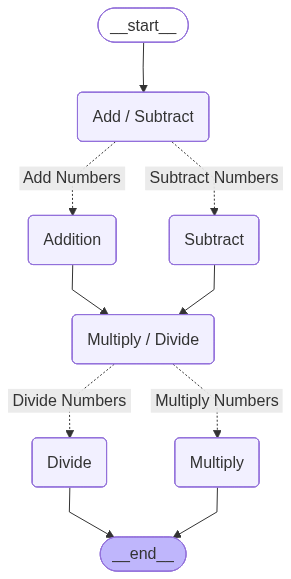

In [6]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))